In [12]:
import pandas 
import numpy as np
import math
import matplotlib.pyplot as plt    
import seaborn as sns
# Return the sine value of 30 degrees
basic_data = [1,2,3,4,5,5,4,3,2,1,1,2,3,4,5]
length_data = len(basic_data)
pi = 3.1415926

repeated = 3

input_data = []
input_column = []

positive_data = []

negative_data = []


columns = []
# generate normal noisy 
for i in range(length_data):
    input_column.append('t'+str(i))
    input_x = 0.25 * i * pi
    input_data.append(input_x)
input_data = np.array(input_data)


def get_sin(x, factor):
    output = []
    for i in x:
        output.append(factor * math.sin(i))
    return np.array(output)

In [13]:
for repeated_time in range(repeated):
    single_output_positive = get_sin(input_data,1)
    single_output_negative = get_sin(input_data,-1)
    noise = np.random.normal(0,0.1,length_data)
    single_output_positive = single_output_positive + noise
    single_output_negative = single_output_negative + noise
    positive_data.append(single_output_positive)
    negative_data.append(single_output_negative)
positive_data.append(get_sin(input_data,1))
negative_data.append(get_sin(input_data,-1))
positive_data = np.array(positive_data)
negative_data = np.array(negative_data)
print(positive_data)
print(negative_data)


[[ 4.97315816e-02  5.95601430e-01  1.09633639e+00  8.22536969e-01
   1.79405781e-01 -7.00633420e-01 -1.17323375e+00 -6.18794144e-01
  -2.44777575e-01  6.73328413e-01  9.45142632e-01  7.10532118e-01
   1.70888607e-01 -5.57309132e-01 -1.05659377e+00]
 [ 2.67418888e-01  8.36956517e-01  1.12415862e+00  6.53092184e-01
   2.60106196e-02 -9.87949459e-01 -1.01232768e+00 -5.95190953e-01
  -6.22950243e-03  7.88086862e-01  7.76480850e-01  6.99537649e-01
   5.20934424e-02 -6.78321575e-01 -1.12520539e+00]
 [-1.86668974e-01  6.74482822e-01  9.67240063e-01  7.19972593e-01
  -1.12217491e-02 -7.11107225e-01 -9.87534052e-01 -4.96192403e-01
   2.56922329e-01  7.19846495e-01  9.54283565e-01  5.07960401e-01
  -3.07664928e-01 -6.76267282e-01 -9.07852855e-01]
 [ 0.00000000e+00  7.07106772e-01  1.00000000e+00  7.07106810e-01
   5.35897932e-08 -7.07106734e-01 -1.00000000e+00 -7.07106848e-01
  -1.07179586e-07  7.07106696e-01  1.00000000e+00  7.07106885e-01
   1.60769379e-07 -7.07106658e-01 -1.00000000e+00]]
[[ 

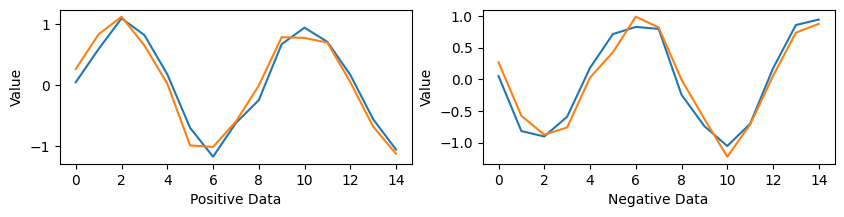

In [14]:
# plot all positive data in different axis 
f, axs = plt.subplots(1, 2, figsize=(10, 2), gridspec_kw=dict(width_ratios=[4, 4]))
axs[0].set_xlabel('Positive Data')
axs[0].set_ylabel('Value')
axs[1].set_xlabel('Negative Data')
axs[1].set_ylabel('Value')
sns.lineplot(data=positive_data[0],ax=axs[0], legend=True)
sns.lineplot(data=positive_data[1],ax=axs[0], legend=True)
# sns.lineplot(data=positive_data[2],ax=axs[0], legend=True)
# sns.lineplot(data=positive_data[3],ax=axs[0], legend=True)
sns.lineplot(data=negative_data[0],ax=axs[1], legend=True)
sns.lineplot(data=negative_data[1],ax=axs[1], legend=True)
# sns.lineplot(data=negative_data[2],ax=axs[1], legend=True)
# sns.lineplot(data=negative_data[3],ax=axs[1], legend=True)
plt.savefig('demo_threepatten_train_sin.pdf',bbox_inches='tight')

# save file to train and test 
train_data = np.concatenate([positive_data[:2], negative_data[:2]], axis=0)
train_data = np.concatenate([train_data, np.array([1,1,0,0]).reshape(-1,1)], axis=1)
test_data = np.concatenate([positive_data[2:], negative_data[2:]], axis=0)
test_data = np.concatenate([test_data, np.array([1,1,0,0]).reshape(-1,1)], axis=1)
train_data = pandas.DataFrame(train_data, columns=input_column+['label'])
test_data = pandas.DataFrame(test_data, columns=input_column+['label'])
train_data.to_csv('demo_sin_train.csv',index=False)
test_data.to_csv('demo_sin_test.csv',index=False)




In [ ]:
basic_data = [1,2,3,4,5,5,4,3,2,1,1,2,3,4,5]
instance = 1
scale = 0.2
positive = [basic_data]
for _ in range(instance):
    erosion = np.random.normal(loc=0.0, scale=scale, size=15)
    erosion = erosion.tolist()
    secodary_data = [x + y for x, y in zip(basic_data, erosion)]
    positive.append(secodary_data)
positive = np.array(positive)
positive_label = np.ones(instance+1)
positive = np.concatenate((positive, positive_label.reshape(-1,1)), axis=1)
positive

In [120]:
basic_negative_data = [5,4,3,2,1,1,2,3,4,5,5,4,3,2,1]
negative = [basic_negative_data]
for _ in range(instance):
    erosion = np.random.normal(loc=0.0, scale=scale, size=15)
    erosion = erosion.tolist()
    second_negative_data = [x + y for x, y in zip(basic_negative_data, erosion)]
    negative.append(second_negative_data)

negative = np.array(negative)
negative_label = np.zeros(instance+1)
negative = np.concatenate((negative, negative_label.reshape(-1,1)), axis=1)
negative

array([[5.        , 4.        , 3.        , 2.        , 1.        ,
        1.        , 2.        , 3.        , 4.        , 5.        ,
        5.        , 4.        , 3.        , 2.        , 1.        ,
        0.        ],
       [4.88112696, 4.1694719 , 2.98371756, 1.91922615, 1.12484087,
        1.16467563, 2.15702027, 2.91994358, 4.12008085, 5.26909564,
        4.57377109, 3.90635513, 3.08860777, 1.6507735 , 1.44683042,
        0.        ]])

In [121]:
columns = []
for i in range(len(basic_data)):
    columns.append(f"t_{i}")
columns.append("label")
positive_df = pandas.DataFrame(positive, columns=columns)
negative_df = pandas.DataFrame(negative, columns=columns)
all_data = pandas.concat([positive_df, negative_df])
all_data.to_csv("demo_threepatten_train.csv", index=False)


In [122]:

data = pandas.read_csv("demo_threepatten_train.csv")


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
positive_data = data[data['label'] == 1]
negative_data = data[data['label'] == 0]
positive_data = positive_data.drop(columns=['label']).to_numpy()
negative_data = negative_data.drop(columns=['label']).to_numpy()
positive_data

array([[1.        , 2.        , 3.        , 4.        , 5.        ,
        5.        , 4.        , 3.        , 2.        , 1.        ,
        1.        , 2.        , 3.        , 4.        , 5.        ],
       [0.9587806 , 2.03809342, 2.76874187, 3.6796454 , 5.00410056,
        4.90118256, 4.2690989 , 3.04000894, 1.46855935, 0.76733638,
        0.95257864, 1.97094238, 3.20414928, 4.29728055, 4.85054162]])

In [124]:
positive_data_nor = (positive_data - positive_data.min()) / (positive_data.max() - positive_data.min())
negative_data_nor = (negative_data - negative_data.min()) / (negative_data.max() - negative_data.min())
positive_data_nor

array([[0.05491541, 0.29094459, 0.52697378, 0.76300296, 0.99903215,
        0.99903215, 0.76300296, 0.52697378, 0.29094459, 0.05491541,
        0.05491541, 0.29094459, 0.52697378, 0.76300296, 0.99903215],
       [0.04518642, 0.29993575, 0.47239011, 0.68738993, 1.        ,
        0.97570835, 0.82651816, 0.53641706, 0.16550909, 0.        ,
        0.04372258, 0.28408614, 0.57515896, 0.83316985, 0.96375561]])

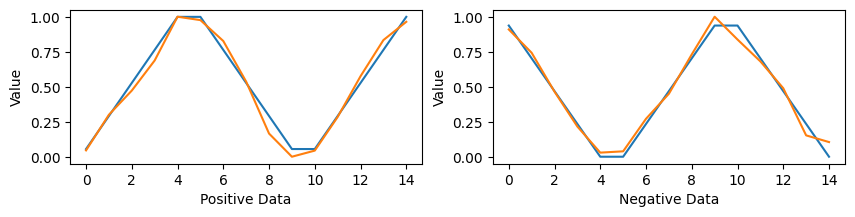

In [125]:
# plot all positive data in different axis 
f, axs = plt.subplots(1, 2, figsize=(10, 2), gridspec_kw=dict(width_ratios=[4, 4]))
axs[0].set_xlabel('Positive Data')
axs[0].set_ylabel('Value')
axs[1].set_xlabel('Negative Data')
axs[1].set_ylabel('Value')
sns.lineplot(data=positive_data_nor[0],ax=axs[0], legend=True)
sns.lineplot(data=positive_data_nor[1],ax=axs[0])
sns.lineplot(data=negative_data_nor[0],ax=axs[1], legend=True)
sns.lineplot(data=negative_data_nor[1],ax=axs[1], legend=True)
plt.savefig('demo_threepatten_train.pdf',bbox_inches='tight')